## The purpose of this file
**Remove search tag** and more node, if necessary, from the original aam to make optimization feasible.<br>
Make an **modified aggregate adjacency matrix** and save it.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "kansairyoko"
hashtag = "関西旅行" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
tau = 444
G = nx.read_graphml(f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam.graphml')

In [3]:
ag = tb.AggregateNetwork(G, tau, hashtag)

In [4]:
ag.tau, ag.searchtag, ag.G.number_of_nodes()

(444, '関西旅行', 8413)

In [5]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
関西旅行,8412
大阪旅行,2272
関西,2265
関西観光,2233
関西グルメ,2181
...,...
二甲料理店,1
toi印食店,1
meshi_sauna,1
Huerto,1


In [6]:
ag.remove_searchtag()

Isolates after removal of the searchtag: 
['food_kyoto_ap', 'meshi_sauna', 'Huerto', 'toi印食店', '二甲料理店']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [7]:
# Check hubs
ag.check_degree()

isolate:[]


,degree
大阪旅行,2271
関西,2264
関西観光,2232
関西グルメ,2180
大阪観光,1963
...,...
anna子連れおでかけspot,1
アグリパーク竜王,1
ルヴァンルパンルヴァン,1
hotelseamore,1


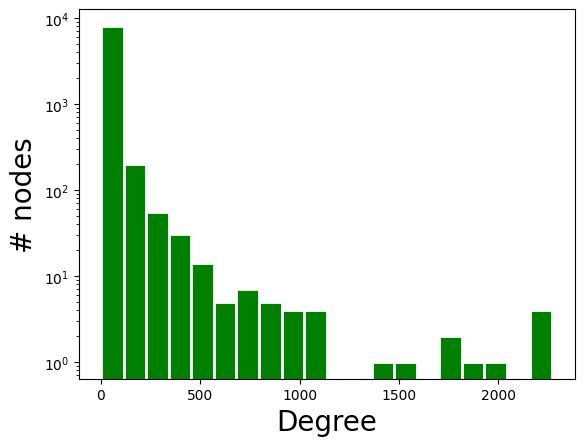

In [8]:
ag.plot_dd(20)

In [9]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4449250817300547, 
its standard error sigma: 0.04680571453049269, 
k_min: 57.0


(2.4449250817300547, 0.04680571453049269, 57.0)

In [10]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 8.239504521785404e-13.


In [11]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.855473753571167.


In [12]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_kansairyoko_21-29_444.pdf
../data/figure/degree_distribution/pdfccdf2_kansairyoko_21-29_444.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4449250817300547, 
its standard error sigma: 0.04680571453049269, 
k_min: 57.0


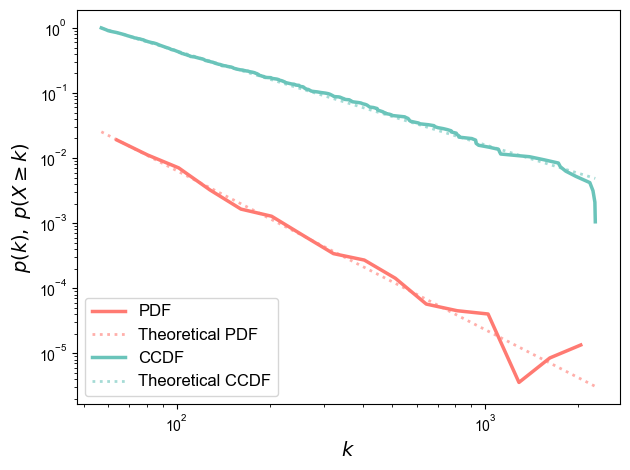

In [13]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.4449250817300547, 
its standard error sigma: 0.04680571453049269, 
k_min: 57.0


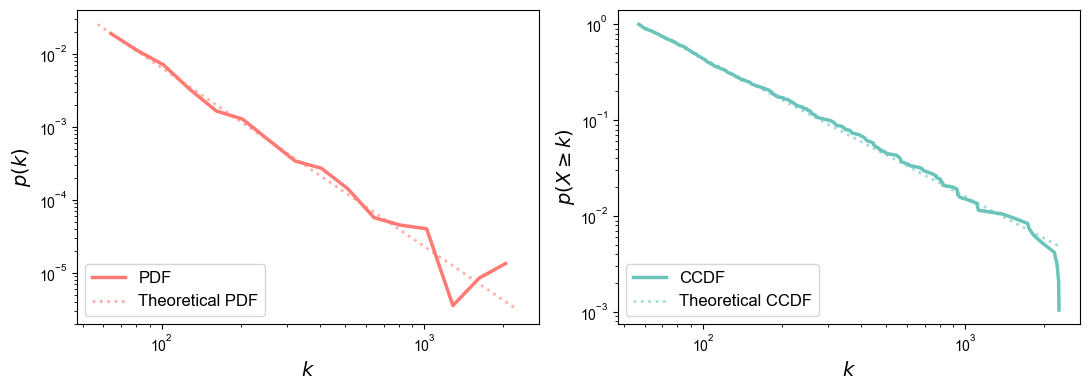

In [14]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [15]:
# Save modified aam for statistical test
nx.write_graphml(ag.G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')